CROSS VALIDATION AND ITS TYPES

TYPES:

1. Leave One out Cross Validations

LOOCV is a special case of K-Fold Cross-Validation where K is equal to the number of instances in the dataset.
In each iteration, one data point is used as the validation set, and the model is trained on the remaining data.
LOOCV is computationally expensive but provides a low bias in the performance estimate.

2. Hold Out Cross Validations

In the context of train-test splits, the random_state parameter holds significance as it plays a crucial role in ensuring consistency and reproducibility during cross-validation processes.

3. K-Fold Cross Validations

In K-Fold Cross-Validation, the dataset is divided into K subsets (folds).
The model is trained on K-1 folds and validated on the remaining fold in each iteration.
This process is repeated K times, with each fold serving as the validation set exactly once.
The final performance metric is usually the average of the metrics from each iteration.


4. Stratified Cross Validations

Stratified K-Fold is used when dealing with imbalanced datasets.
It ensures that each fold maintains the same class distribution as the original dataset.
This is particularly useful when there is a significant class imbalance, and you want to ensure that each class is represented in both training and validation sets.

5. Time Series Cross Validations

In time series analysis, where data points have temporal dependencies, traditional cross-validation methods may not be suitable.
Time Series Cross-Validation involves training the model on past data and validating on future data, maintaining the temporal order.
Common techniques include expanding window, rolling window, and walk-forward validation.


EXAMPLE REPRESENTING CROSS VALIDATIONS TECHNIQUES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast_df = load_breast_cancer()

In [4]:
# breast_df

In [5]:
X=pd.DataFrame(breast_df.data,columns=breast_df.feature_names)
y=pd.DataFrame(breast_df.target,columns=['Target'])

In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [10]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred = model.predict(x_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

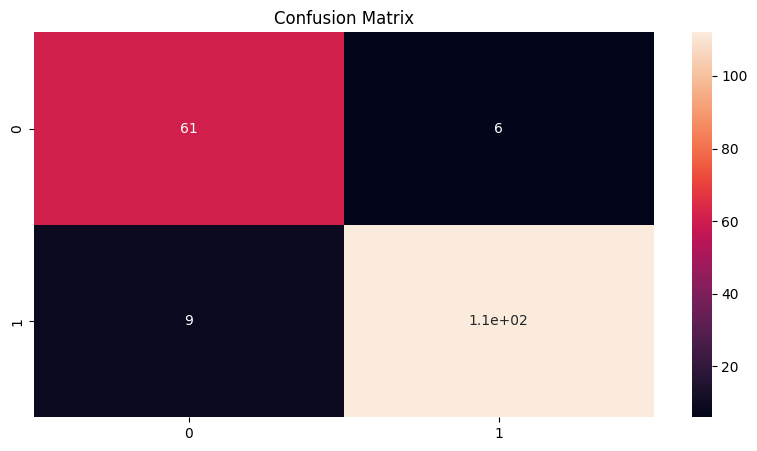

In [13]:
plt.figure(figsize=(10,5))
plt.title("Confusion Matrix")
sns.heatmap(matrix,annot=True);

In [14]:
print(report)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        67
           1       0.95      0.93      0.94       121

    accuracy                           0.92       188
   macro avg       0.91      0.92      0.91       188
weighted avg       0.92      0.92      0.92       188



In [15]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.6521524608363143

In [16]:
y.value_counts()

Target
1         357
0         212
Name: count, dtype: int64

HOLD OUT CROSS VALIDATION - TRAIN TEST SPLIT

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=100)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.9415204678362573

K-FOLD CROSS VALIDATION

In [18]:
from sklearn.model_selection import KFold
model = DecisionTreeClassifier()
kfold_validation = KFold(10)

In [19]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=model,X=X,y=y,cv=kfold_validation)
score

array([0.94736842, 0.9122807 , 0.85964912, 0.94736842, 0.89473684,
       0.98245614, 0.9122807 , 0.98245614, 0.94736842, 0.91071429])

In [20]:
score.mean()

0.9296679197994988

STRATIFIED CROSS VALIDATION

In [21]:
from sklearn.model_selection import StratifiedKFold
stratified_validation  =  StratifiedKFold(n_splits=5)
score = cross_val_score(model,X=X,y=y,cv=stratified_validation)
score

array([0.9122807 , 0.92105263, 0.9122807 , 0.95614035, 0.88495575])

In [22]:
score.mean()

0.9173420276354604

LEAVE ONE OUT CROSS VALIDATION

In [23]:
from sklearn.model_selection import LeaveOneOut
leaveoneout_validation = LeaveOneOut()
score = cross_val_score(model,X=X,y=y,cv=leaveoneout_validation)
score

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [24]:
score.mean()

0.9209138840070299